# Test MobileFaceNet Model
This notebook demonstrates how to load your trained MobileFaceNet model and test it on a new image, including extracting embeddings for face recognition.

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('mobilefacenet_trained.h5')
print('Model loaded successfully.')

Model loaded successfully.


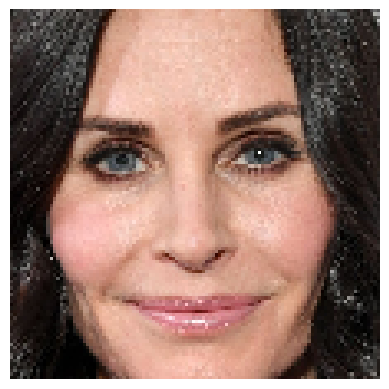

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class probabilities: [[9.9990606e-01 6.2250594e-10 2.2378275e-05 5.9900252e-08 1.4308519e-08
  1.1568588e-06 9.4292586e-12 1.7331198e-10 1.1895983e-08 7.7145908e-11
  3.7090418e-11 1.9947727e-08 9.8898767e-10 1.6237195e-06 9.6661654e-07
  7.4710084e-07 4.7457625e-08 9.7422947e-07 3.5155590e-10 1.9388069e-11
  1.8749254e-10 1.7116989e-08 5.7659122e-09 4.0620965e-10 5.7778794e-05
  7.7683862e-06 2.1528244e-07 3.5109085e-10 6.1403952e-08 3.7612002e-09]]
Embedding shape: (30,)
Embedding: [9.9990606e-01 6.2250594e-10 2.2378275e-05 5.9900252e-08 1.4308519e-08
 1.1568588e-06 9.4292586e-12 1.7331198e-10 1.1895983e-08 7.7145908e-11
 3.7090418e-11 1.9947727e-08 9.8898767e-10 1.6237195e-06 9.6661654e-07
 7.4710084e-07 4.7457625e-08 9.7422947e-07 3.5155590e-10 1.9388069e-11
 1.8749254e-10 1.7116989e-08 5.7659122e-09 4.0620965e-10 5.7778794e-05
 7.7683862e-06 2.1528244e-07 3.5109085e-10 6.1403952e-08 3.7612002e-09

In [29]:
# Input the path to your test image
img_path = input('Enter the path to the test image: ')

# Load and preprocess the image
img = image.load_img(img_path, target_size=(112, 112))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get prediction (class probabilities)
preds = model.predict(img_array)
print('Predicted class probabilities:', preds)

# If you want the embedding (remove the last softmax layer in your model for this)
# If your model outputs embeddings directly, use preds as the embedding
embedding = preds[0]
print('Embedding shape:', embedding.shape)
print('Embedding:', embedding)

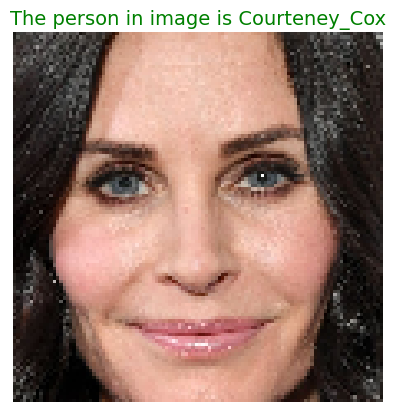

Identified person: Courteney_Cox


In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load class_indices mapping for correct prediction
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
idx_to_class = {v: k for k, v in class_indices.items()}

# Get predicted class index
pred_class_idx = int(np.argmax(preds[0]))
person_name = idx_to_class[pred_class_idx]

# Display the image with the predicted name as the title
plt.imshow(img)
plt.axis('off')
plt.title(f'The person in image is {person_name}', fontsize=14, color='green')
plt.show()

print(f"Identified person: {person_name}")